In [1]:
import os
import numpy as np

In [2]:
from Params import *

In [3]:
os.getcwd()

'E:\\researches\\EQTest\\SocialAffordance'

In [4]:
label_path = "../data/label2.txt"

In [5]:
def load_survey(label_path):
    survey = []
    with open(label_path, "r") as f:
        for c, line in enumerate(f.readlines()):
            line_info = line.strip().split(",")
            #print(c)
            sample_info = line_info[0].split("_")
            #print(item)
            item = {"m1": sample_info[0], "e11": sample_info[1], "e12": sample_info[2],
                   "m2": sample_info[3], "e21": sample_info[4], "e22": sample_info[5],
                   "d": sample_info[6], "t": sample_info[7]}
            label_info = line_info[1].split("_")
            item["quality"] = label_info[0]
            item["dominance"] = label_info[1]
            item["intimacy"] = label_info[2]

            survey.append(item)
    
    return survey
        

In [6]:
survey = load_survey(label_path)

In [7]:
print(*survey)

{'m1': 'Sad', 'e11': 'Scared', 'e12': 'Mock', 'm2': 'Laughing', 'e21': 'Sad', 'e22': 'Neutral', 'd': '4', 't': '2', 'quality': 'Bad', 'dominance': 'Equal', 'intimacy': 'Medium'} {'m1': 'Wiping', 'e11': 'Tired', 'e12': 'Surprise', 'm2': 'Whatever', 'e21': 'Confused', 'e22': 'Sad', 'd': '4', 't': '1', 'quality': 'Good', 'dominance': 'Character two', 'intimacy': 'Close'} {'m1': 'Defeat', 'e11': 'Excited', 'e12': 'Confused', 'm2': 'Shaking', 'e21': 'Curious', 'e22': 'Frustrated', 'd': '4', 't': '-2', 'quality': 'Good', 'dominance': 'Character one', 'intimacy': 'Medium'} {'m1': 'Arguing', 'e11': 'Frustrated', 'e12': 'Tired', 'm2': 'Shaking', 'e21': 'Dissatisfied', 'e22': 'Embarrased', 'd': '4', 't': '-2', 'quality': 'Good', 'dominance': 'Character two', 'intimacy': 'Alienated'} {'m1': 'Bow', 'e11': 'Tired', 'e12': 'Confused', 'm2': 'Bow', 'e21': 'Disgust', 'e22': 'Curious', 'd': '4', 't': '2', 'quality': 'Good', 'dominance': 'Equal', 'intimacy': 'Medium'} {'m1': 'Offensive', 'e11': 'Embarra

In [8]:
len(G_INTEACT_KEY_WORDS)

69

In [9]:
c_good = []
c_bad = []

In [10]:
c_m = np.zeros((len(G_INTEACT_KEY_WORDS), len(G_INTEACT_KEY_WORDS)))
c_e = np.zeros((len(G_BASIC_EMOTIONS), len(G_BASIC_EMOTIONS)))

In [11]:
import seaborn as sns

In [12]:
for item in survey:
    i = G_INTEACT_KEY_WORDS.index(item["m1"])
    j = G_INTEACT_KEY_WORDS.index(item["m2"])
    c_m[i,j] += 1
    
    i = G_BASIC_EMOTIONS.index(item["e12"])
    j = G_BASIC_EMOTIONS.index(item["e22"])
    c_e[i,j] += 1
    
    if item["quality"] == "Good":
        c_good.append(1.0)
    else:
        c_good.append(0)
        
    if item["quality"] == "Bad":
        c_bad.append(1.0)
    else:
        c_bad.append(0)
        
        
    

In [13]:
print(np.mean(c_good[:100]))

0.37


In [14]:
print(np.mean(c_good[:200]))

0.395


In [15]:
print(np.mean(c_good))

0.36818181818181817


In [16]:
print(np.mean(c_bad[:100]))
print(np.mean(c_bad[:200]))
print(np.mean(c_bad))

0.36
0.26
0.2409090909090909


<AxesSubplot:>

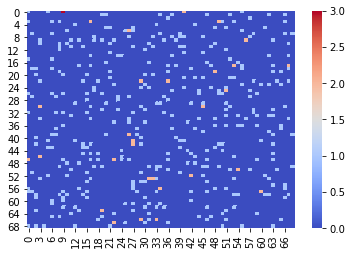

In [17]:
sns.heatmap(c_m, cmap="coolwarm")

<AxesSubplot:>

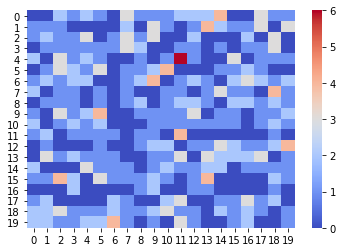

In [18]:
sns.heatmap(c_e, cmap="coolwarm")

In [19]:
c1_motion_data = np.asarray([G_INTEACT_KEY_WORDS.index(item['m1']) for item in survey], dtype=int)
c1_motion_one_hot = np.zeros((c1_motion_data.size, len(G_INTEACT_KEY_WORDS)))
c1_motion_one_hot[np.arange(c1_motion_data.size),c1_motion_data] = 1

In [20]:
#print(c1_motion_data)

In [21]:
c2_motion_data = np.asarray([G_INTEACT_KEY_WORDS.index(item['m2']) for item in survey], dtype=int)
c2_motion_one_hot = np.zeros((c2_motion_data.size, len(G_INTEACT_KEY_WORDS)))
c2_motion_one_hot[np.arange(c2_motion_data.size),c2_motion_data] = 1

In [22]:
c1_emotion_start_data = np.asarray([G_BASIC_EMOTIONS.index(item['e11']) for item in survey], dtype=int)
c1_emotion_start_one_hot = np.zeros((c1_emotion_start_data.size, len(G_BASIC_EMOTIONS)))
c1_emotion_start_one_hot[np.arange(c1_emotion_start_data.size),c1_emotion_start_data] = 1

In [23]:
c1_emotion_end_data = np.asarray([G_BASIC_EMOTIONS.index(item['e12']) for item in survey], dtype=int)
c1_emotion_end_one_hot = np.zeros((c1_emotion_end_data.size, len(G_BASIC_EMOTIONS)))
c1_emotion_end_one_hot[np.arange(c1_emotion_end_data.size),c1_emotion_end_data] = 1

In [24]:
c2_emotion_start_data = np.asarray([G_BASIC_EMOTIONS.index(item['e21']) for item in survey], dtype=int)
c2_emotion_start_one_hot = np.zeros((c2_emotion_start_data.size, len(G_BASIC_EMOTIONS)))
c2_emotion_start_one_hot[np.arange(c2_emotion_start_data.size),c2_emotion_start_data] = 1

In [25]:
c2_emotion_end_data = np.asarray([G_BASIC_EMOTIONS.index(item['e22']) for item in survey], dtype=int)
c2_emotion_end_one_hot = np.zeros((c2_emotion_end_data.size, len(G_BASIC_EMOTIONS)))
c2_emotion_end_one_hot[np.arange(c2_emotion_end_data.size),c2_emotion_end_data] = 1

In [26]:
distance_scores = {'2': -1, '4': 0, '8': 1}

In [27]:
distance = np.asarray([[distance_scores[item['d']]] for item in survey], dtype=int)

In [28]:
time_difference = np.asarray([[int(item['t'])] for item in survey], dtype=int)

In [29]:
quality_scores = {"Bad":0, "Just so so":1, "Good": 2}

In [30]:
quality_data = np.asarray([quality_scores[item['quality']] for item in survey], dtype=int)
quality_data_one_hot = np.zeros((quality_data.size, len(quality_scores)))
quality_data_one_hot[np.arange(quality_data.size),quality_data] = 1

In [31]:
dominance_scores = {"Character one":0, "Equal":1, "Character two": 2}

In [32]:
dominance_data = np.asarray([dominance_scores[item['dominance']] for item in survey], dtype=int)
dominance_data_one_hot = np.zeros((dominance_data.size, len(dominance_scores)))
dominance_data_one_hot[np.arange(dominance_data.size),dominance_data] = 1

In [33]:
intimacy_scores = {"Alienated":0, "Medium":1, "Close": 2}

In [34]:
intimacy_data = np.asarray([intimacy_scores[item['intimacy']] for item in survey], dtype=int)
intimacy_data_one_hot = np.zeros((intimacy_data.size, len(intimacy_scores)))
intimacy_data_one_hot[np.arange(intimacy_data.size),intimacy_data] = 1

In [35]:
intimacy_data

array([1, 2, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 2, 2,
       1, 0, 1, 2, 0, 2, 2, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 2, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 2, 1, 1, 0, 1,
       2, 1, 2, 1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 2,
       2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2,
       1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2,
       2, 2, 0, 0, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 2, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 1,

# Train Motion 2 Intimacy

In [36]:
all_X = np.concatenate([c1_motion_one_hot, c2_motion_one_hot, distance], axis = 1)

In [37]:
all_X.shape

(440, 139)

In [38]:
all_Y1 = dominance_data

In [39]:
all_Y1.shape

(440,)

In [40]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

In [41]:
class DomNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(DomNet, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(), 
            nn.Linear(hidden_dim, output_dim),
            nn.Softmax(dim=1)
        )
    def forward(self, x):
        x = self.network(x)
        return x

In [42]:
dom_net = DomNet(all_X.shape[1], 128, 3)

In [43]:
#a = torch.randn(16, all_X.shape[1])

In [44]:
#dom_net(a)

In [45]:
learning_rate = 0.001
epochs = 200
batch_size = 4
print_every = 20

In [46]:
tensor_x = torch.Tensor(all_X) # transform to torch tensor
tensor_y = torch.Tensor(all_Y1).long()

In [47]:
all_dataset = TensorDataset(tensor_x,tensor_y) # create your datset

In [48]:
train_num = int(0.8 * len(all_dataset))
text_num = len(all_dataset) - train_num

In [49]:
train_dataset, test_dataset = torch.utils.data.random_split(all_dataset, [train_num, text_num])

In [50]:
print(len(train_dataset), len(test_dataset))

352 88


In [51]:
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [52]:
loss_fun = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(dom_net.parameters(), lr=learning_rate)

In [53]:
for i in range(epochs):
    train_loss = []
    test_loss = []
    acc = []
    
    dom_net.train()
    for batch_sample, batch_label in train_dataloader:
        pred_label = dom_net(batch_sample)
        loss = loss_fun(pred_label, batch_label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())
    
    dom_net.eval()
    for batch_sample, batch_label in test_dataloader:
        pred_label = dom_net(batch_sample)
        pred = torch.argmax(pred_label, dim=1)
        loss = loss_fun(pred_label, batch_label)
        test_loss.append(loss.item())
        acc.append(torch.sum(pred == batch_label).item()/len(batch_label))
    
    if i % print_every == 0:
        print("epoch:", i,"train loss:", sum(train_loss)/len(train_loss), "test loss:", sum(test_loss)/len(test_loss), 
              "acc:", sum(acc)/len(acc))
    

epoch: 0 train loss: 1.0590261918577282 test loss: 1.0249954705888575 acc: 0.5113636363636364
epoch: 20 train loss: 0.5776687853715636 test loss: 1.0067734257741408 acc: 0.5227272727272727
epoch: 40 train loss: 0.5755940547043626 test loss: 1.0053518143567173 acc: 0.5454545454545454
epoch: 60 train loss: 0.5713937411254103 test loss: 0.993874270807613 acc: 0.5568181818181818
epoch: 80 train loss: 0.5713548626412045 test loss: 0.9999862231991508 acc: 0.5568181818181818
epoch: 100 train loss: 0.5713409930467606 test loss: 1.0022710372101178 acc: 0.5454545454545454
epoch: 120 train loss: 0.5713355514136228 test loss: 1.0034359937364405 acc: 0.5454545454545454
epoch: 140 train loss: 0.5713386623696848 test loss: 1.0069071487946943 acc: 0.5454545454545454
epoch: 160 train loss: 0.5713353035124865 test loss: 1.0127822783860294 acc: 0.5340909090909091
epoch: 180 train loss: 0.5713332200592215 test loss: 1.0174061981114475 acc: 0.5227272727272727
